In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
url = 'https://raw.githubusercontent.com/AinunZalfa12/Data-ainun/main/data%20ainun.csv'
df = pd.read_csv(url)
df

,X1,X2,Y
0,50,25,60
1,40,30,65
2,60,35,55
3,55,40,70
4,45,50,62
5,65,55,75
6,70,60,80
7,75,65,85
8,80,70,90
9,90,66,95


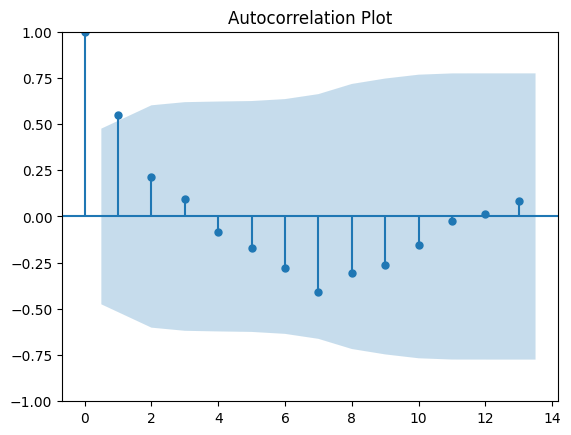

In [4]:
# UJI AUTOKORELASI
plot_acf(y)
plt.title('Autocorrelation Plot')
plt.show()

In [5]:
#UJI Heteroskedastisitas
# Select the independent variables (X1, X2) and the dependent variable (Y)
X = df[['X1', 'X2']]  # Independent variables
y = df['Y']           # Dependent variable

# Add a constant (intercept) to the X matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Perform White's test for heteroskedasticity
white_test = het_white(model.resid, X)
print("White's Test Results:")
print("LM Statistic:", white_test[0])
print("LM-Test p-value:", white_test[1])
print("F-Test p-value:", white_test[2])
print("Score (Robust) Test p-value:", white_test[3])


White's Test Results:
LM Statistic: 2.9298907538339485
LM-Test p-value: 0.7107938093853218
F-Test p-value: 0.4581172431330685
Score (Robust) Test p-value: 0.7993777373369594


In [7]:
#UJI Mulikolonieritas
# Select the independent variables (X1, X2) and the dependent variable (Y)
X = df[['X1', 'X2']]  # Independent variables
y = df['Y']           # Dependent variable

# Add a constant (intercept) to the X matrix
X = sm.add_constant(X, prepend=False)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif)


Variance Inflation Factors (VIF):
  Variable        VIF
0       X1   1.694379
1       X2   1.694379
2    const  17.006655


In [8]:
#regression model & visual 3D
# Select the independent variables (X1, X2) and the dependent variable (Y)
X = df[['X1', 'X2']]  # Independent variables
X = sm.add_constant(X)  # Add a constant (intercept)
Y = df['Y']           # Dependent variable

model = sm.OLS(Y, X).fit()  # Create OLS regression model
summary = model.summary()  # Display model summary
print(summary)

# Scatter plot to visualize the relationship between X1, X2, and Y
fig = px.scatter_3d(df, x='X1', y='X2', z='Y', title='Scatter Plot 3D')

# Multiple regression as a plane
xx, yy = np.meshgrid(df['X1'], df['X2'])
zz = model.params['const'] + model.params['X1'] * xx + model.params['X2'] * yy
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.8, colorscale='Viridis'))

fig.show()

from statsmodels.stats.diagnostic import het_breuschpagan

_, p_value, _, _ = het_breuschpagan(model.resid, X)
if p_value < 0.05:
    print("Terdapat bukti heteroskedastisitas.")
else:
    print("Tidak terdapat bukti heteroskedastisitas.")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.808
Date:                Sat, 14 Oct 2023   Prob (F-statistic):             0.0943
Time:                        10:56:55   Log-Likelihood:                -72.119
No. Observations:                  17   AIC:                             150.2
Df Residuals:                      14   BIC:                             152.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.1359     18.553      3.349      0.0

Tidak terdapat bukti heteroskedastisitas.


Koefisien X1: -0.4747795657572892
Koefisien X2: 0.7503226879482834
Intercept: 62.13586844150551


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



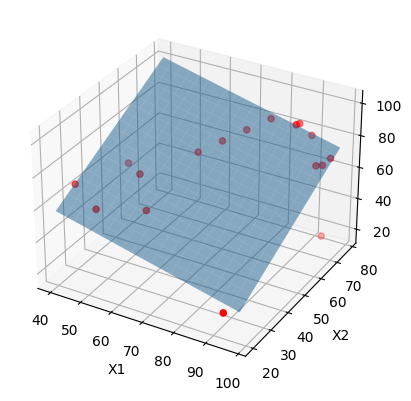

In [10]:
#Menampilkan Visual
X = df[['X1', 'X2']]
y = df['Y']

model = LinearRegression()
model.fit(X, y)

# Koefisien regresi
coef_x1 = model.coef_[0]
coef_x2 = model.coef_[1]
intercept = model.intercept_

print(f'Koefisien X1: {coef_x1}')
print(f'Koefisien X2: {coef_x2}')
print(f'Intercept: {intercept}')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X1'], df['X2'], df['Y'], c='r', marker='o')

# Prediksi hasil regresi untuk plot permukaan
x1_range = np.linspace(df['X1'].min(), df['X1'].max(), 20)
x2_range = np.linspace(df['X2'].min(), df['X2'].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred = model.predict(np.column_stack((x1_mesh.ravel(), x2_mesh.ravel())))
y_pred = y_pred.reshape(x1_mesh.shape)

ax.plot_surface(x1_mesh, x2_mesh, y_pred, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()